In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [5]:

df = pd.read_csv("C:/Users/anusha/OneDrive/Desktop/sample.csv")

np.random.seed(0)
ages = np.concatenate([
    np.random.randint(0, 21, size=512),      # 0-20
    np.random.randint(21, 65, size=807),     # 21-64
    np.random.randint(65, 101, size=98)      # 65+
])
genders = np.random.choice(['Male','Female','Other'], size=len(ages), p=[0.49, 0.49, 0.02])
df = pd.DataFrame({'age': ages, 'gender': genders})

print("Rows:", len(df))
print(df.head())


Rows: 1417
   age  gender
0   12    Male
1   15  Female
2    0  Female
3    3    Male
4    3    Male


In [7]:
print(df.info())        # column names and types
print(df.isnull().sum())# missing values per column
print(df['age'].describe())  # summary stats for age
print(df['gender'].value_counts())  # counts for categories


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1417 entries, 0 to 1416
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     1417 non-null   int32 
 1   gender  1417 non-null   object
dtypes: int32(1), object(1)
memory usage: 16.7+ KB
None
age       0
gender    0
dtype: int64
count    1417.000000
mean       33.287227
std        22.962296
min         0.000000
25%        14.000000
50%        31.000000
75%        50.000000
max       100.000000
Name: age, dtype: float64
gender
Female    703
Male      678
Other      36
Name: count, dtype: int64


In [9]:
# Standardize column names (lowercase)
df = df.rename(columns=lambda c: c.strip().lower())

# Ensure age is numeric
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Strip whitespace and standardize gender
df['gender'] = df['gender'].astype(str).str.strip().str.title()  # 'male' -> 'Male'

# Drop rows where age is missing (or handle differently)
df = df.dropna(subset=['age'])
df['age'] = df['age'].astype(int)

# Optionally: filter unrealistic ages
df = df[(df['age'] >= 0) & (df['age'] <= 120)]

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1417 entries, 0 to 1416
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     1417 non-null   int32 
 1   gender  1417 non-null   object
dtypes: int32(1), object(1)
memory usage: 16.7+ KB
None


In [11]:
# Drop rows with missing gender if you want strict category completeness:
df = df.dropna(subset=['gender'])

# Cap extreme ages at 100 (example)
df['age'] = df['age'].clip(upper=100)

# Alternatively, to impute missing age with median (example):
# median_age = df['age'].median()
# df['age'] = df['age'].fillna(median_age)



In [13]:
# Example: 10-year bins: 0-9, 10-19, ... 90-99, 100+
bin_edges = list(range(0, 101, 10)) + [np.inf]   # last bin captures 100+
bin_labels = [f"{i}-{i+9}" for i in range(0,100,10)] + ["100+"]

df['age_group'] = pd.cut(df['age'], bins=bin_edges, labels=bin_labels, right=False)
age_group_counts = df['age_group'].value_counts().sort_index()
age_group_percent = (age_group_counts / age_group_counts.sum() * 100).round(1)

print(age_group_counts)
print(age_group_percent)


age_group
0-9      260
10-19    227
20-29    195
30-39    190
40-49    177
50-59    200
60-69     81
70-79     26
80-89     30
90-99     29
100+       2
Name: count, dtype: int64
age_group
0-9      18.3
10-19    16.0
20-29    13.8
30-39    13.4
40-49    12.5
50-59    14.1
60-69     5.7
70-79     1.8
80-89     2.1
90-99     2.0
100+      0.1
Name: count, dtype: float64


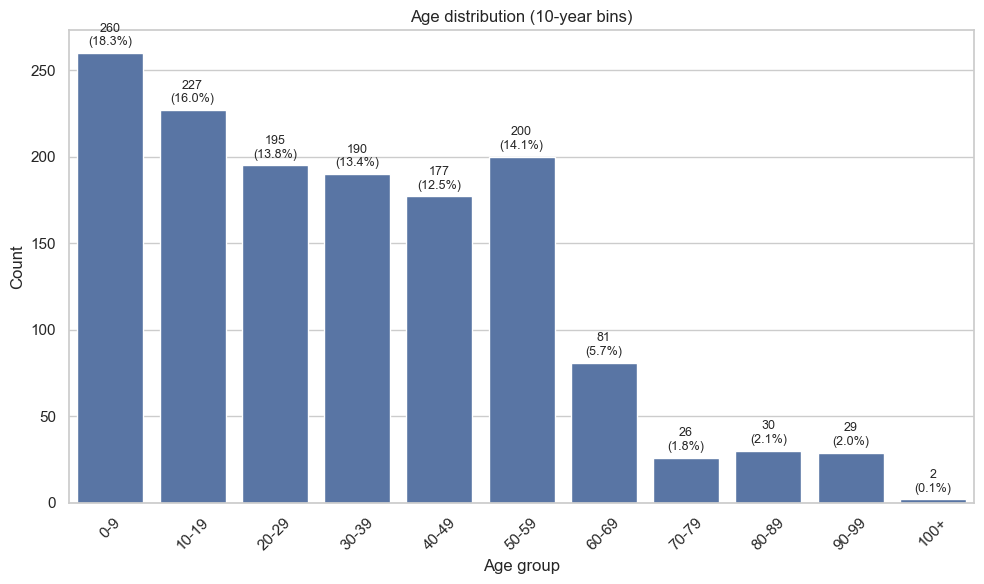

In [15]:
plt.figure(figsize=(10,6))
# Use the counts computed from groups so bars align with labels
ax = sns.barplot(x=age_group_counts.index, y=age_group_counts.values)
plt.title("Age distribution (10-year bins)")
plt.xlabel("Age group")
plt.ylabel("Count")
plt.xticks(rotation=45)

# Annotate each bar with count and percent
for i, (label, count) in enumerate(age_group_counts.items()):
    pct = age_group_percent.loc[label]
    ax.text(i, count + max(age_group_counts)*0.01, f"{count}\n({pct}%)", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig("age_group_histogram.png", dpi=300, bbox_inches='tight')
plt.show()


Median age: 31.0, Mean age: 33.3


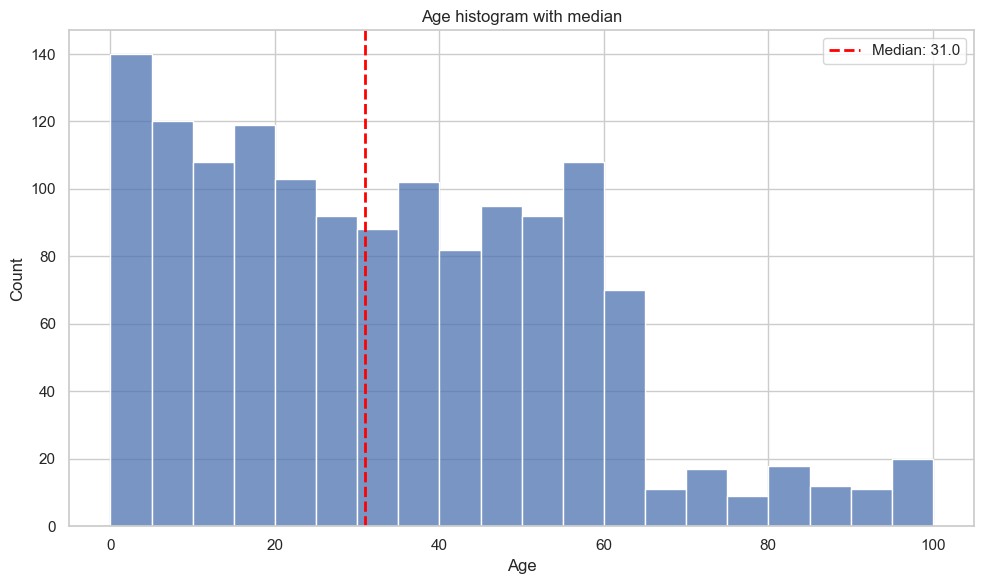

In [17]:
median_age = df['age'].median()
mean_age = df['age'].mean()
print(f"Median age: {median_age}, Mean age: {mean_age:.1f}")

# Example: add median line to continuous histogram
plt.figure(figsize=(10,6))
sns.histplot(df['age'], bins=20)
plt.axvline(median_age, color='red', linestyle='--', linewidth=2, label=f"Median: {median_age}")
plt.legend()
plt.title("Age histogram with median")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("age_histogram_median.png", dpi=300, bbox_inches='tight')
plt.show()

